# Analyzing Coursera Data

Looking For Trends in Coursera Computer Science Courses

## Imports

Libraries

In [190]:
import numpy as np
import pandas as pd 
from matplotlib import pyplot as plt
import plotly.express as px

Dataset turned into dataframe so it is readable

In [191]:
raw_coursera = pd.read_json('courseInfov2.JSON')
pd.set_option('display.max_columns', None)


Breaking up ReviewStarPercentage into each individual star/percentage to read them individually

In [192]:
myDict = {
    'reviewStarPercentage': raw_coursera['reviewStarPercentage']
}
fiveStarList = []
fourStarList = []
threeStarList = []
twoStarList = []
oneStarList = []

for i in myDict['reviewStarPercentage']:
    try:
        fiveStarList.append(i[0][1]) 
    except:
        fiveStarList.append(0)
    try:
        fourStarList.append(i[1][1])
    except:
        fourStarList.append(0)
    try:
        threeStarList.append(i[2][1])
    except:
        threeStarList.append(0)
    try:
        twoStarList.append(i[3][1])
    except:
        twoStarList.append(0)
    try:
        oneStarList.append(i[4][1])
    except:
        oneStarList.append(0)
        
raw_coursera['fiveStarReviewPercentage'] = fiveStarList
raw_coursera['fourStarReviewPercentage'] = fourStarList
raw_coursera['threeStarReviewPercentage'] = threeStarList
raw_coursera['twoStarReviewPercentage'] = twoStarList
raw_coursera['oneStarReviewPercentage'] = oneStarList

## Cleaning the Data

Removes non-numerical text from numerical data

In [193]:
coursera = raw_coursera.copy(deep=True) 

coursera['enrolledCount'] = raw_coursera['enrolledCount'].str.replace('\D+', '', regex=True)
coursera['ratingCount'] = raw_coursera['ratingCount'].str.replace('\D+', '', regex=True)
coursera['ratingPercentage'] = raw_coursera['ratingPercentage'].str.replace('\D+', '', regex=True)
coursera['instructorRatingCount'] = raw_coursera['instructorRatingCount'].str.replace('\D+', '', regex=True)  
coursera['fiveStarReviewPercentage'] = raw_coursera['fiveStarReviewPercentage'].str.replace('%', '', regex=True)
coursera['fourStarReviewPercentage'] = raw_coursera['fourStarReviewPercentage'].str.replace('%', '', regex=True)
coursera['threeStarReviewPercentage'] = raw_coursera['threeStarReviewPercentage'].str.replace('%', '', regex=True)
coursera['twoStarReviewPercentage'] = raw_coursera['twoStarReviewPercentage'].str.replace('%', '', regex=True)
coursera['oneStarReviewPercentage'] = raw_coursera['oneStarReviewPercentage'].str.replace('%', '', regex=True)
coursera.head()

,link,date,title,subheading,ratingPercentage,rating,ratingCount,enrolledCount,recentViews,instructorRatingCount,instructorRating,reviewCount,reviewRating,aboutThisCourse,contentRating,contentRatingCount,syllabus,partners,whatYouWillLearn,skills,productGlance,instructors,reviewStarPercentage,learnerCareerOutcomes,detailsToKnow,courseraPlus,fiveStarReviewPercentage,fourStarReviewPercentage,threeStarReviewPercentage,twoStarReviewPercentage,oneStarReviewPercentage
0,https://www.coursera.org/learn/introduction-to...,2023-08-05,Introduction to Computer Programming,This course is part of Introduction to Compute...,91,4.1,805,69167,-1,202,4.3,-1,4.1,There are 3 modules in this course\n\nThis MOO...,-1,-1,"[[Your development environment, 9 hours to com...","[University of London, Goldsmiths, University ...",[],[],"[[Beginner level, No previous experience neces...","[[Dr Edward Anstead, University of London, 2 C...","[[5 stars, 60.12%], [4 stars, 16.52%], [3 star...","[Build your subject-matter expertise, This cou...","[[Shareable certificate, Add to your LinkedIn ...",True,60.12,16.52,8.07,2.73,12.54
1,https://www.coursera.org/learn/how-computers-w...,2023-08-05,How Computers Work,This course is part of Introduction to Compute...,94,4.6,508,32711,-1,122,4.7,-1,4.6,There are 4 modules in this course\n\nComputer...,-1,-1,"[[Abstraction, 1 hour to complete, This week s...","[University of London, Goldsmiths, University ...",[],[],"[[Beginner level, No previous experience neces...","[[Prof Marco Gillies, University of London, [1...","[[5 stars, 72.63%], [4 stars, 19.88%], [3 star...","[Build your subject-matter expertise, This cou...","[[Shareable certificate, Add to your LinkedIn ...",True,72.63,19.88,4.33,1.57,1.57
2,https://www.coursera.org/learn/mathematics-for...,2023-08-05,Mathematics for Computer Science,This course is part of Introduction to Compute...,82,4.1,203,30138,-1,51,4.6,-1,4.1,There are 6 modules in this course\n\n“Welcome...,-1,-1,"[[Number bases - binary, 7 hours to complete, ...","[University of London, Goldsmiths, University ...",[1. Transform numbers between number bases...,[],"[[Beginner level, No previous experience neces...","[[Omar Karakchi, University of London, 1 Cours...","[[5 stars, 58.12%], [4 stars, 17.24%], [3 star...","[Build your subject-matter expertise, This cou...","[[Shareable certificate, Add to your LinkedIn ...",True,58.12,17.24,10.83,5.41,8.37
3,https://www.coursera.org/learn/python-for-appl...,2023-08-05,"Python for Data Science, AI & Development",This course is part of multiple programs. \nLe...,93,4.6,32545,608517,-1,6493,4.5,-1,4.6,There are 5 modules in this course\n\nKickstar...,-1,-1,"[[Python Basics, 2 hours to complete, This mod...",[IBM],"[Describe Python Basics including Data Types, ...","[Data Science, Python Programming, Data Analys...","[[Beginner level, Recommended experience], [23...","[[Joseph Santarcangelo, IBM, [25 Courses, 1,03...","[[5 stars, 71.96%], [4 stars, 20.82%], [3 star...","[Build your subject-matter expertise, This cou...","[[Shareable certificate, Add to your LinkedIn ...",False,71.96,20.82,4.60,1.47,1.29
4,https://www.coursera.org/learn/what-is-datasci...,2023-08-05,What is Data Science?,This course is part of multiple programs. \nLe...,97,4.7,64199,817744,-1,16960,4.7,-1,4.7,There are 3 modules in this course\n\nDo you w...,-1,-1,[[Defining Data Science and What Data Scientis...,[IBM],[Define data science and its importance in tod...,"[Data Science, Deep Learning, Machine Learning...","[[Beginner level, Recommended experience], [7 ...","[[Rav Ahuja, IBM, [37 Courses, 1,785,449 learn...","[[5 stars, 76.12%], [4 stars, 19.12%], [3 star...","[Build your subject-matter expertise, This cou...","[[Shareable certificate, Add to your LinkedIn ...",False,76.12,19.12,3.26,0.80,0.84


Turns string format numerical data into actual numbers to read

In [194]:
coursera["enrolledCount"] = pd.to_numeric(coursera["enrolledCount"])
coursera["ratingPercentage"] = pd.to_numeric(coursera["ratingPercentage"])
coursera["rating"] = pd.to_numeric(coursera["rating"], errors='coerce')
coursera["ratingCount"] = pd.to_numeric(coursera["ratingCount"])
coursera["instructorRatingCount"] = pd.to_numeric(coursera["instructorRatingCount"])
coursera["instructorRating"] = pd.to_numeric(coursera["instructorRating"])
coursera["reviewRating"] = pd.to_numeric(coursera["reviewRating"])
coursera["fiveStarReviewPercentage"] = pd.to_numeric(coursera["fiveStarReviewPercentage"])
coursera["fourStarReviewPercentage"] = pd.to_numeric(coursera["fourStarReviewPercentage"])
coursera["threeStarReviewPercentage"] = pd.to_numeric(coursera["threeStarReviewPercentage"])
coursera["twoStarReviewPercentage"] = pd.to_numeric(coursera["twoStarReviewPercentage"])
coursera["oneStarReviewPercentage"] = pd.to_numeric(coursera["oneStarReviewPercentage"])

Removes Duplicates

In [195]:
coursera['partners'] = coursera['partners'].apply(tuple)

coursera = coursera.drop_duplicates(subset=["title", "partners"], keep='first')

## Creating New Columns

Function made to that checks whether a row contains a keywords

In [196]:
def keywordCheck(keyword, column):
    myList = []
    for i in column:
        try:
            if keyword in i:
                myList.append(True)
            else:
                myList.append(False)
        except: continue
    return myList

Adds column that shows whether a course contains a certain skill

In [197]:
coursera["hasPython"] = keywordCheck("Python Programming", coursera["skills"])
coursera["hasMachineLearning"] = keywordCheck("Machine Learning", coursera["skills"])
coursera["hasDataAnalysis"] = keywordCheck("Data Analysis", coursera["skills"])
coursera["hasDataScience"] = keywordCheck("Data Science", coursera["skills"])
coursera["hasAlgorithms"] = keywordCheck("Algorithms", coursera["skills"])
coursera["hasSQL"] = keywordCheck("SQL", coursera["skills"])
coursera["hasAI"] = keywordCheck("Artificial Intelligence (AI)", coursera["skills"])
coursera["hasRProgramming"] = keywordCheck("R Programming", coursera["skills"])
coursera["hasDataVisualization"] = keywordCheck("Data Visualization (DataViz)", coursera["skills"])
coursera["hasDebugging"] = keywordCheck("Debugging", coursera["skills"])
coursera["hasCloudComputing"] = keywordCheck("Cloud Computing", coursera["skills"])
coursera["hasMySQL"] = keywordCheck("MySQL", coursera["skills"])
coursera["hasDeepLearning"] = keywordCheck("Deep Learning", coursera["skills"])
coursera["hasCProgramming"] = keywordCheck("C Programming", coursera["skills"])
coursera["hasTensorflow"] = keywordCheck("Tensorflow", coursera["skills"])
coursera["hasLinux"] = keywordCheck("Linux", coursera["skills"])
coursera["hasJavaScript"] = keywordCheck("JavaScript", coursera["skills"])
coursera["hasInternetOfThings"] = keywordCheck("Internet Of Things (IOT)", coursera["skills"])
coursera["hasDatabase"] = keywordCheck("Database (DBMS)", coursera["skills"])
coursera["hasDjango"] = keywordCheck("Django (Web Framework)", coursera["skills"])
coursera["hasFrontEnd"] = keywordCheck("Front-End Web Development", coursera["skills"])
coursera["hasGithub"] = keywordCheck("Github", coursera["skills"])

# Single Variable EDA

## Bar Graphs

In [198]:
array = coursera['skills']
skillsDict = {}

for i in range(len(array)):
    for j in range(len(array[i])):
        if not (array[i][j] in skillsDict):
            skillsDict[array[i][j]] = 1
        else:
            skillsDict[array[i][j]] += 1 

"""uniqueSkillsValue = len(skillsDict)
print(f'''Unique Skills: {uniqueSkillsValue}\n-----------------\n''')

for keys, value in skillsDict.items():
    print(f'''{keys} = {value}''')"""

KeyError: 7

In [ ]:
sortedList = sorted(skillsDict.items(), key=lambda x:x[1], reverse=True)
sortedSkillsDict = dict(sortedList)

skillsdf = pd.DataFrame.from_dict({"Skills": [key for key in sortedSkillsDict.keys()][0:15], "Occurences": [value for value in sortedSkillsDict.values()][0:15]})

fig = px.bar(skillsdf, y='Skills', x='Occurences')
fig.update_layout(title_text='Top 15 Most Occuring Skills')

fig.show()

Python Programming, Machine Learning is very popular, then a little drop off to Data Analysis/Science, then a drop off with the rest of the top 10 Occuring Skills.

Cutoff after Algorithms

May be beneficial to look at the next 5-10 occuring skills and compare those topics with the rest of the top 10

In [ ]:
skillsdf = pd.DataFrame.from_dict({"Skills": [key for key in sortedSkillsDict.keys()][7:25], "Occurences": [value for value in sortedSkillsDict.values()][7:25]})

fig = px.bar(skillsdf, y='Skills', x='Occurences')
fig.update_layout(title_text='Top 7-25 Most Occuring Skills')

fig.show()

Skill Count has Steady Decrease

In [ ]:
array = coursera['productGlance']
productGlanceDict = {}

for i in range(len(array)):
    for j in range(len(array[i])):
        if not (array[i][j][0] in productGlanceDict):
            productGlanceDict[array[i][j][0]] = 1
        else:
            productGlanceDict[array[i][j][0]] += 1 

sortedList = sorted(productGlanceDict.items(), key=lambda x:x[1], reverse=True)
sortedProductGlanceDict = dict(sortedList)

"""uniqueProductGlanceValue = len(productGlanceDict)
print(f'''Unique Product Glance: {uniqueProductGlanceValue}\n-----------------\n''')

for keys, value in sortedProductGlanceDict.items():
    print(f'''{keys} = {value}''')"""
    

"uniqueProductGlanceValue = len(productGlanceDict)\nprint(f'''Unique Product Glance: {uniqueProductGlanceValue}\n-----------------\n''')\n\nfor keys, value in sortedProductGlanceDict.items():\n    print(f'''{keys} = {value}''')"

In [ ]:
skillsdf = pd.DataFrame.from_dict({"Product Glance": [key for key in sortedProductGlanceDict.keys()][0:10], "Occurences": [value for value in sortedProductGlanceDict.values()][0:10]})

fig = px.bar(skillsdf, y='Product Glance', x='Occurences')
fig.update_layout(title_text='Top 10 Most Occuring Product Glance')

fig.show()

Flexible schedule is universal within the courses.

Courses have different hours, it may be useful to group the courses by hours to complete and see if it makes a difference

Courses have different levels, it may be useful to group the courses by level and see if it makes a difference

In [ ]:
array = coursera['learnerCareerOutcomes']
learnerCareerOutcomesDict = {}

for i in range(len(array)):
    for j in range(len(array[i])):
        if not (array[i][j] in learnerCareerOutcomesDict):
            learnerCareerOutcomesDict[array[i][j]] = 1
        else:
            learnerCareerOutcomesDict[array[i][j]] += 1 

sortedList = sorted(learnerCareerOutcomesDict.items(), key=lambda x:x[1], reverse=True)
sortedLearnerCareerOutcomesDict = dict(sortedList)

"""uniqueLearnerCareerOutcomesValue = len(learnerCareerOutcomesDict)
print(f'''Unique Learner Career Outcomes: {uniqueLearnerCareerOutcomesValue}\n-----------------\n''')

for keys, value in sortedLearnerCareerOutcomesDict.items():
    print(f'''{keys} = {value}''')"""
    

"uniqueLearnerCareerOutcomesValue = len(learnerCareerOutcomesDict)\nprint(f'''Unique Learner Career Outcomes: {uniqueLearnerCareerOutcomesValue}\n-----------------\n''')\n\nfor keys, value in sortedLearnerCareerOutcomesDict.items():\n    print(f'''{keys} = {value}''')"

In [ ]:
skillsdf = pd.DataFrame.from_dict({"Learner Career Outcomes": [key for key in sortedLearnerCareerOutcomesDict.keys()][0:10], "Occurences": [value for value in sortedLearnerCareerOutcomesDict.values()][0:10]})

fig = px.bar(skillsdf, y='Learner Career Outcomes', x='Occurences')
fig.update_layout(title_text='Top 10 Most Occuring Learner Career Outcomes')

fig.show()

Top 3 Learner Career Outcomes are universal

Earn a Shareable Certificate may be interesting to look at

Build Your Subject Matter Expertise has other "{INSERT BUILD YOUR}" Expertise, but at much lower counts

This course is available as part of multiple programs... is interesting to look at

Maybe we can compare earn a shareable career certificate from XYZ with the courses that doesnt share career certificate

In [ ]:
array = coursera['detailsToKnow']
detailsToKnowDict = {}

for i in range(len(array)):
    for j in range(len(array[i])):
        if not (array[i][j][0] in detailsToKnowDict):
            detailsToKnowDict[array[i][j][0]] = 1
        else:
            detailsToKnowDict[array[i][j][0]] += 1 

sortedList = sorted(detailsToKnowDict.items(), key=lambda x:x[1], reverse=True)
sortedDetailsToKnowDict = dict(sortedList)

In [ ]:
detailsToKnowdf = pd.DataFrame.from_dict({"Details To Know": [key for key in sortedDetailsToKnowDict.keys()][0:10], "Occurences": [value for value in sortedDetailsToKnowDict.values()][0:10]})


fig = px.bar(detailsToKnowdf, y='Details To Know', x='Occurences')
fig.update_layout(title_text='Top 10 Most Occuring Details To Know')

fig.show()

Recently Updated is interesting to look at, can compare with that and the rest of the courses

In [ ]:
array = coursera['partners']
partnersDict = {}

for i in range(len(array)):
    for j in range(len(array[i])):
        if not (array[i][j] in partnersDict):
            partnersDict[array[i][j]] = 1
        else:
            partnersDict[array[i][j]] += 1 

sortedList = sorted(partnersDict.items(), key=lambda x:x[1], reverse=True)
sortedPartnersDict = dict(sortedList)

"""uniquePartnerValue = len(partnersDict)
print(f'''Unique Partners: {uniquePartnerValue}\n-----------------\n''')

for keys, value in partnersDict.items():
    print(f'''{keys} = {value}''')"""

"uniquePartnerValue = len(partnersDict)\nprint(f'''Unique Partners: {uniquePartnerValue}\n-----------------\n''')\n\nfor keys, value in partnersDict.items():\n    print(f'''{keys} = {value}''')"

In [ ]:
detailsToKnowdf = pd.DataFrame.from_dict({"Partners": [key for key in sortedPartnersDict.keys()][0:10], "Occurences": [value for value in sortedPartnersDict.values()][0:10]})


fig = px.bar(detailsToKnowdf, y='Partners', x='Occurences')
fig.update_layout(title_text='Top 10 Most Occuring Partners')

fig.show()

Instructors dominated by IBM, it may be useful to look at if the providers actually matter

In [ ]:
array = coursera['instructors']
instructorsDict = {}

for i in range(len(array)):
    for j in range(len(array[i])):
        if array[i][j][0] == "Top Instructor":
            if not (array[i][j][1] in instructorsDict):
                instructorsDict[array[i][j][1]] = 1
            else:
                instructorsDict[array[i][j][1]] += 1    
        else:     
            if not (array[i][j][0] in instructorsDict):
                instructorsDict[array[i][j][0]] = 1
            else:
                instructorsDict[array[i][j][0]] += 1 

sortedList = sorted(instructorsDict.items(), key=lambda x:x[1], reverse=True)
sortedInstructorsDict = dict(sortedList)

"""uniqueInstructorsValue = len(instructorsDict)
print(f'''Unique Instructors: {uniqueInstructorsValue}\n-----------------\n''')

for keys, value in instructorsDict.items():
    print(f'''{keys} = {value}''')"""

"uniqueInstructorsValue = len(instructorsDict)\nprint(f'''Unique Instructors: {uniqueInstructorsValue}\n-----------------\n''')\n\nfor keys, value in instructorsDict.items():\n    print(f'''{keys} = {value}''')"

In [ ]:
instructorsdf = pd.DataFrame.from_dict({"Instructors": [key for key in sortedInstructorsDict.keys()][0:10], "Occurences": [value for value in sortedInstructorsDict.values()][0:10]})


fig = px.bar(instructorsdf, y='Instructors', x='Occurences')
fig.update_layout(title_text='Top 10 Most Occuring Instructors')

fig.show()

META Staff is dominating, seems pretty correlated to the partners because most partners have the same people instructing. Maybe instructors matter more than the provider? Or not, interesting to look at

# Pairwise EDA

## Scatter plots

In [ ]:
fig = px.scatter(coursera, y="enrolledCount", x="instructorRating")
fig.show()


Seems like successful courses need at least a 4.25 instructor rating

In [ ]:
underThreshold = coursera[coursera['instructorRating'] < 4.25]
overThreshold = coursera[coursera['instructorRating'] > 4.25]

print(f'''under 4.25 mean Enrolled Count: {underThreshold['enrolledCount'].mean()}''')
print(f'''over 4.25 mean Enrolled Count: {overThreshold['enrolledCount'].mean()}''')

under 4.25 mean Enrolled Count: 17785.643356643355
over 4.25 mean Enrolled Count: 108218.28708133972


In [ ]:
coursera["instructorRatingFraction"] = coursera['instructorRatingCount'] / coursera['enrolledCount']

In [ ]:
fig = px.scatter(coursera, y="enrolledCount", x="instructorRatingFraction")
fig.show()

Looks like the ratio of instructor interaction/enrolled matters and is positively correlated

In [ ]:
fig = px.scatter(coursera, y="enrolledCount", x="instructorRatingCount")
fig.show()

Looks like enrolledCount and instructorRatingCount are positively correlated. Might just be because more enrolled means more chances for people to comment. Maybe investigate if its a linear trend

In [ ]:
coursera["ratingFraction"] = coursera['ratingCount'] / coursera['enrolledCount']

In [ ]:
fig = px.scatter(coursera, y="enrolledCount", x="ratingFraction")
fig.show()

Looks like rating fraction does matter and is positively correlated with enrolled Count

In [ ]:
fig = px.scatter(coursera, y="enrolledCount", x="ratingCount")
fig.show()

Looks like enrolledCount and instructorRatingCount are positively correlated. Might just be because more enrolled means more chances for people to comment. Maybe investigate if its a linear relationship

In [ ]:
fig = px.scatter(coursera, y="enrolledCount", x="reviewRating")
fig.show()

Looks like the review rating needs to be at least 4.5 for a course to be successful

In [ ]:
underThreshold = coursera[coursera['reviewRating'] < 4.25]
overThreshold = coursera[coursera['reviewRating'] > 4.25]

print(f'''under 4.25 mean Enrolled Count: {underThreshold['enrolledCount'].mean()}''')
print(f'''over 4.25 mean Enrolled Count: {overThreshold['enrolledCount'].mean()}''')

under 4.25 mean Enrolled Count: 21292.73076923077
over 4.25 mean Enrolled Count: 103770.73257142857


In [ ]:
fig = px.scatter(coursera, y="enrolledCount", x="ratingPercentage")
fig.show()

Looks like the ratingPercentage needs to be at least 91% for a good course

In [ ]:
fig = px.scatter(coursera, y="enrolledCount", x="rating")
fig.update_layout(
    xaxis_range=[0, 5],  # Set x-axis range to 0-5
)
fig.show()

Looks like the rating needs to be at least 4.5 for a good course

In [ ]:
fig = px.scatter(coursera, y="enrolledCount", x="fiveStarReviewPercentage")
fig.update_layout(
    xaxis_range=[-5, 100],  # Set x-axis range to 0-5
)
fig.show()

Looks like the best courses have a five star review percentage from 65% to 90%. Anything above 90% is no good

In [ ]:
fig = px.scatter(coursera, y="enrolledCount", x="fourStarReviewPercentage")
fig.update_layout(
    xaxis_range=[-5, 100],  # Set x-axis range to 0-5
)
fig.show()

Looks like the best courses have a four star percentage from 10% to 25%

In [ ]:
fig = px.scatter(coursera, y="enrolledCount", x="threeStarReviewPercentage")
fig.update_layout(
    xaxis_range=[-5, 100],  # Set x-axis range to 0-5
)
fig.show()

The best 3 star percentage has the best success from 0%-5%

In [ ]:
fig = px.scatter(coursera, y="enrolledCount", x="twoStarReviewPercentage")
fig.update_layout(
    xaxis_range=[-5, 100],  # Set x-axis range to 0-5
)
fig.show()

The best 2 star percentage has the best success from 0%-2%

In [ ]:
fig = px.scatter(coursera, y="enrolledCount", x="oneStarReviewPercentage")
fig.update_layout(
    xaxis_range=[-5, 100],  # Set x-axis range to 0-5
)
fig.show()

The best 2 star percentage has the best success from 0%-2%

## Violin Plots


In [ ]:
fig = px.violin(coursera, y="enrolledCount", x="courseraPlus")
fig.show()

Looks like CourseraPlus does have a benefit

# Has a Certain Skill? Graphs

In [ ]:
fig = px.violin(coursera, y="enrolledCount", x="hasPython")
fig.show()

Looks like python courses are popular

In [ ]:
fig = px.violin(coursera, y="enrolledCount", x="hasMachineLearning")
fig.show()

Looks like machine learning is not actually that popular

In [ ]:
fig = px.violin(coursera, y="enrolledCount", x="hasDataScience")
fig.show()

Looks like data science is popular

In [ ]:
fig = px.violin(coursera, y="enrolledCount", x="hasDataAnalysis")
fig.show()

Looks like Data analysis is popular

In [ ]:
fig = px.violin(coursera, y="enrolledCount", x="hasAlgorithms")
fig.show()

Looks like algorithms could help a little

In [ ]:
fig = px.violin(coursera, y="enrolledCount", x="hasSQL")
fig.show()

Looks like has SQL is popular

In [ ]:
fig = px.violin(coursera, y="enrolledCount", x="hasAI")
fig.show()

Looks like AI is not that important

In [ ]:
fig = px.violin(coursera, y="enrolledCount", x="hasRProgramming")
fig.show()

Looks like R Programming is pretty good

## Comparing Skills With Each Other


First Group Courses by if they have a skill

In [ ]:
boolean_columns = ['hasPython', 'hasMachineLearning', 'hasDataAnalysis', 'hasDataScience',
                   'hasAlgorithms', 'hasSQL', 'hasAI', 'hasRProgramming', 'hasDataVisualization',
                   'hasDebugging', 'hasCloudComputing', 'hasMySQL', 'hasDeepLearning',
                   'hasCProgramming', 'hasTensorflow', 'hasLinux', 'hasJavaScript',
                   'hasInternetOfThings', 'hasDatabase', 'hasDjango', 'hasFrontEnd', 'hasGithub']

# Create a dictionary to store separate DataFrames
dataframes = {}

# Iterate through the boolean columns and create separate DataFrames
for column in boolean_columns:
    dataframes[column] = coursera[coursera[column] == True]

In [ ]:
# Calculate median of "enrolledCount" for each DataFrame
medians = {}
for df_name, df in dataframes.items():
    median = df['enrolledCount'].median()
    medians[df_name] = median

# Display the medians
"""for df_name, median in medians.items():
    print(f"Median for {df_name}: {median}")"""


'for df_name, median in medians.items():\n    print(f"Median for {df_name}: {median}")'

In [ ]:
keys = list(medians.keys())
medians_values = list(medians.values())

# Create a bar plot using Plotly Express
fig = px.bar(y=keys, x=medians_values, labels={'x': 'Skill', 'y': 'Median Enrolled Count'},
             title='Median Enrolled Count vs Skill')

fig.update_layout(
    xaxis=dict(tickfont=dict(size=10)),
    yaxis=dict(tickfont=dict(size=10)),)

# Show the plot
fig.show()

Deep Learning, data visualization, data science, data analysis, SQL is pretty good

In [ ]:
# Calculate median of "enrolledCount" for each DataFrame
means = {}
for df_name, df in dataframes.items():
    mean = df['enrolledCount'].mean()
    means[df_name] = mean

# Display the medians
"""for df_name, mean in means.items():
    print(f"Median for {df_name}: {mean}")"""


'for df_name, mean in means.items():\n    print(f"Median for {df_name}: {mean}")'

In [ ]:
keys = list(means.keys())
means_values = list(means.values())

fig = px.bar(y=keys, x=means_values, labels={'x': 'Skill', 'y': 'Mean Enrolled Count'},
             title='Median Enrolled Count vs Skill')

fig.update_layout(
    xaxis=dict(tickfont=dict(size=10)),
    yaxis=dict(tickfont=dict(size=10)),)

# Show the plot
fig.show()

# Looking at Stuff thats in the Product Glance

## Looking at the Time it Takes to Finish a Course

In [ ]:
import re

hoursToComplete = []
check = False

for array in coursera['productGlance']:
    check = False
    for array2 in array:
        for element in array2:
            if "hour" in element:
                hoursToComplete.append(re.sub(r'\D', '', element))
                check = True
                break
        if check == True:
            break
    if check == False:
        hoursToComplete.append(None)

In [ ]:
coursera['hoursToComplete'] = hoursToComplete
coursera["hoursToComplete"] = pd.to_numeric(coursera["hoursToComplete"])

In [ ]:
# Create a bar plot using Plotly Express
fig = px.scatter(coursera, y="enrolledCount", x="hoursToComplete",
             title='Enrolled Count vs Hours To Complete')

# Show the plot
fig.show()

Best hours are between 20-35 hours

Looks like the most popular Ranges ie between 15-30, especially in the high 10s, low 20s

## Looking at the Skill Level Required to Finish the Course 

In [ ]:
coursera['productGlance'][0]

[['Beginner level', 'No previous experience necessary'],
 ['21 hours (approximately)', ''],
 ['Flexible schedule', 'Learn at your own pace'],
 ['Prepare for a degree', 'Learn more']]

In [ ]:
check = False
experienceLevel = []

for array in coursera['productGlance']:
    check = False
    for array2 in array:
        for element in array2:
            if "level" in element:
                experienceLevel.append(element)
                check = True
                break
        if check == True:
            break
    if check == False:
        experienceLevel.append(None)


In [ ]:
coursera['experienceLevel'] = experienceLevel
coursera.head()

,link,date,title,subheading,ratingPercentage,rating,ratingCount,enrolledCount,recentViews,instructorRatingCount,instructorRating,reviewCount,reviewRating,aboutThisCourse,contentRating,contentRatingCount,syllabus,partners,whatYouWillLearn,skills,productGlance,instructors,reviewStarPercentage,learnerCareerOutcomes,detailsToKnow,courseraPlus,fiveStarReviewPercentage,fourStarReviewPercentage,threeStarReviewPercentage,twoStarReviewPercentage,oneStarReviewPercentage,hasPython,hasMachineLearning,hasDataAnalysis,hasDataScience,hasAlgorithms,hasSQL,hasAI,hasRProgramming,hasDataVisualization,hasDebugging,hasCloudComputing,hasMySQL,hasDeepLearning,hasCProgramming,hasTensorflow,hasLinux,hasJavaScript,hasInternetOfThings,hasDatabase,hasDjango,hasFrontEnd,hasGithub,instructorRatingFraction,ratingFraction,hoursToComplete,experienceLevel
0,https://www.coursera.org/learn/introduction-to...,2023-08-05,Introduction to Computer Programming,This course is part of Introduction to Compute...,91.0,4.1,805.0,69167.0,-1,202.0,4.3,-1,4.1,There are 3 modules in this course\n\nThis MOO...,-1,-1,"[[Your development environment, 9 hours to com...","(University of London, Goldsmiths, University ...",[],[],"[[Beginner level, No previous experience neces...","[[Dr Edward Anstead, University of London, 2 C...","[[5 stars, 60.12%], [4 stars, 16.52%], [3 star...","[Build your subject-matter expertise, This cou...","[[Shareable certificate, Add to your LinkedIn ...",True,60.12,16.52,8.07,2.73,12.54,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0.002920,0.011638,21.0,Beginner level
1,https://www.coursera.org/learn/how-computers-w...,2023-08-05,How Computers Work,This course is part of Introduction to Compute...,94.0,4.6,508.0,32711.0,-1,122.0,4.7,-1,4.6,There are 4 modules in this course\n\nComputer...,-1,-1,"[[Abstraction, 1 hour to complete, This week s...","(University of London, Goldsmiths, University ...",[],[],"[[Beginner level, No previous experience neces...","[[Prof Marco Gillies, University of London, [1...","[[5 stars, 72.63%], [4 stars, 19.88%], [3 star...","[Build your subject-matter expertise, This cou...","[[Shareable certificate, Add to your LinkedIn ...",True,72.63,19.88,4.33,1.57,1.57,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0.003730,0.015530,8.0,Beginner level
2,https://www.coursera.org/learn/mathematics-for...,2023-08-05,Mathematics for Computer Science,This course is part of Introduction to Compute...,82.0,4.1,203.0,30138.0,-1,51.0,4.6,-1,4.1,There are 6 modules in this course\n\n“Welcome...,-1,-1,"[[Number bases - binary, 7 hours to complete, ...","(University of London, Goldsmiths, University ...",[1. Transform numbers between number bases...,[],"[[Beginner level, No previous experience neces...","[[Omar Karakchi, University of London, 1 Cours...","[[5 stars, 58.12%], [4 stars, 17.24%], [3 star...","[Build your subject-matter expertise, This cou...","[[Shareable certificate, Add to your LinkedIn ...",True,58.12,17.24,10.83,5.41,8.37,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0.001692,0.006736,35.0,Beginner level
3,https://www.coursera.org/learn/python-for-appl...,2023-08-05,"Python for Data Science, AI & Development",This course is part of multiple programs. \nLe...,93.0,4.6,32545.0,608517.0,-1,6493.0,4.5,-1,4.6,There are 5 modules in this course\n\nKickstar...,-1,-1,"[[Python Basics, 2 hours to complete, This mod...","(IBM,)","[Describe Python Basics including Data Types, ...","[Data Science, Python Programming, Data Analys...","[[Beginner level, Recommended experience], [23...","[[Joseph Santarcangelo, IBM, [25 Courses, 1,03...","[[5 stars, 71.96%], [4 stars, 20.82%], [3 star...","[Build your subject-matter expertise, This cou...","[[Shareable certificate, Add to your LinkedIn ..

In [ ]:
fig = px.violin(coursera, x="experienceLevel", y="enrolledCount", title="Enrolled Count vs Experience Level", box=True, points="all")
fig.show()

Beginner has the best chance of the top 1% enrolled coun course, but intermediate still has success

The harder the course, the harder it is to enroll

## Looking at Progress Towards A Degree

In [ ]:
check = False
degree = []

for array in coursera['productGlance']:
    check = False
    for array2 in array:
        for element in array2:
            if "Prepare for" in element:
                degree.append(True)
                check = True
                break
        if check == True:
            break
    if check == False:
        degree.append(False)


In [ ]:
coursera['progressDegree'] = degree

fig = px.violin(coursera, x='progressDegree', y= 'enrolledCount', title='progressDegree vs enrolledCount', box=True, points="all")
fig.show()

If a course earns a degree its pretty good

# Looking at Learner Career Outcome Stuff

In [ ]:
coursera['learnerCareerOutcomes'][0]

['Build your subject-matter expertise',
 "This course is part of the Introduction to Computer Science and Programming Specialization\nWhen you enroll in this course, you'll also be enrolled in this Specialization.",
 'Learn new concepts from industry experts',
 'Gain a foundational understanding of a subject or tool',
 'Develop job-relevant skills with hands-on projects',
 'Earn a shareable career certificate']

In [ ]:
check = False
certificate = []

for array in coursera['learnerCareerOutcomes']:
    check = False
    for element in array:
        if "Earn a shareable career certificate from Google" in element:
            certificate.append("Google")
            check = True
            break
        elif "Earn a shareable career certificate from IBM" in element:
            certificate.append("IBM")
            check = True
            break
        elif "Earn a shareable career certificate from Meta" in element:
            certificate.append("Meta")
            check = True
            break
        elif "Earn a shareable career certificate" in element:
            certificate.append("Other")
            check = True
            break
    if check == False:
        certificate.append("None")

In [ ]:
coursera['earnCertificate'] = certificate

fig = px.violin(coursera, x='earnCertificate', y= 'enrolledCount', title='Earn Certificate vs enrolledCount', box=True, points="all")
fig.show()

Google certificates are popular and other

If Its From Google, Meta, IBM, certificate. Looks like all of them earn a certificate

In [ ]:
check = False
multipleProgram = []

for array in coursera['learnerCareerOutcomes']:
    check = False
    for element in array:
        if "This course is available as part" in element:
            multipleProgram.append(True)
            check = True
            break
    if check == False:
        multipleProgram.append(False)

In [ ]:
coursera['multipleProgram'] = multipleProgram

fig = px.violin(coursera, x='multipleProgram', y= 'enrolledCount', title='multipleProgram vs enrolledCount', box=True, points="all")
fig.show()

If the course is in multiple programs then it does not have too much impact

# Looking at Details to Know

In [ ]:
coursera['detailsToKnow'][0]

[['Shareable certificate', 'Add to your LinkedIn profile'],
 ['Quizzes and assessments', '10 quizzes, 0 assessments'],
 ['English', 'Subtitles: German, Russian, \n+10 more']]

In [ ]:
check = False
recentlyUpdated = []

for array in coursera['detailsToKnow']:
    check = False
    for array2 in array:
        for element in array2:
            if "Recently updated" in element:
                recentlyUpdated.append(True)
                check = True
                break
        if check == True:
            break
    if check == False:
        recentlyUpdated.append(False)

In [ ]:
coursera['recentlyUpdated'] = recentlyUpdated

fig = px.violin(coursera, x='recentlyUpdated', y= 'enrolledCount', title='recentlyUpdated vs enrolledCount', box=True, points="all")
fig.show()

Recently Updated has no real impact

In [ ]:
check = False
recentlyUpdated = []

for array in coursera['detailsToKnow']:
    check = False
    for array2 in array:
        for element in array2:
            if "Recently updated" in element:
                recentlyUpdated.append(True)
                check = True
                break
        if check == True:
            break
    if check == False:
        recentlyUpdated.append(False)

# Looking at Subheading

In [ ]:
coursera['subheading'][0]
print(coursera['subheading'].index)

RangeIndex(start=0, stop=1002, step=1)


In [ ]:
check = False
largerCourseType = []

for element in coursera['subheading']:
    if "This course is part of multiple programs." in element:
            largerCourseType.append("Multiple Programs")
    elif "Specialization" in element:
            largerCourseType.append("Specialization")
    else:
        largerCourseType.append("None")

In [ ]:
coursera['largerCourseType'] = largerCourseType

fig = px.violin(coursera, x='largerCourseType', y= 'enrolledCount', title='largerCourseType vs enrolledCount', box=True, points="all")
fig.show()

Doesn't really matter, multiple programs might be better

# Looking at Partners

In [ ]:
partnerdf = coursera.explode('partners')

In [ ]:
import plotly.graph_objects as go

unique_categories = partnerdf['partners'].unique()

plots = []
arr = []
count = 0
for category in unique_categories:
    if count < 5:
        arr.append(partnerdf[partnerdf['partners'] == category])
        count += 1
    else:
        df_subset = pd.concat(arr, ignore_index=True)
        fig = go.Figure(data=[go.Violin(x=df_subset['partners'], y=df_subset['enrolledCount'], points="all")])
        fig.update_layout(title=f'Numerical Values for Category {category}')
        plots.append(fig)
        count = 0
        arr = []
    
for plot in plots:
    plot.show()


## Amount of Courses a Partner Has vs Mean Enrolled Count

In [ ]:
unique_categories = partnerdf['partners'].unique()
courseCount = {}
meanCount = {}

for category in unique_categories:
    catdf = partnerdf[partnerdf['partners'] == category]
    courseCount[category] = catdf.shape[0]
    meanCount[category] = catdf['enrolledCount'].mean()

data = {
    'courseCount': courseCount,
    'mean': meanCount
}

tempdf = pd.DataFrame(data)

fig = px.scatter(tempdf, x='courseCount', y= 'mean', title='courseCount vs mean')
fig.show()

# Looking at About This Course

In [ ]:
def truncate_after_modules(text):
    position = text.find(" modules")
    if position != -1:
        return text[:position + len(" modules")]
    else:
        return text

def replace_greater_than_100(value):
    if value > 100:
        return None
    else:
        return value


ATC_df = coursera['aboutThisCourse'].apply(truncate_after_modules)
coursera['moduleCount'] = ATC_df.str.replace('\D+', '', regex=True)
coursera["moduleCount"] = pd.to_numeric(coursera["moduleCount"])
coursera['moduleCount'] = coursera['moduleCount'].apply(replace_greater_than_100)

fig = px.scatter(coursera, y='enrolledCount', x= 'moduleCount', title='moduleCount vs enrolledCount')
fig.show()


# Looking at Instructors

In [ ]:
coursera['instructors'][14]

[['Top Instructor',
  'Google Career Certificates',
  'Google',
  ['286 Courses', '7,143,694 learners']]]

## Looking at Top Instructors

In [ ]:
topInstructor = []
for arr in coursera['instructors']:
    flag = 0
    for arr2 in arr:
        for element in arr2:
            if element == "Top Instructor":
                topInstructor.append(True)
                flag = 1
                break
        if flag == 1:
            break
    if flag == 0:
        topInstructor.append(False)

coursera['containsTopInstructor'] = topInstructor

fig = px.violin(coursera, y='enrolledCount', x= 'containsTopInstructor', title='containsTopInstructor vs enrolledCount', box=True, points="all")
fig.show()

Top instructor matters

## Looking at Individual Instructors

In [ ]:
topInstructorCount = []

for arr in coursera['instructors']:
    count = 0
    for arr2 in arr:
        for element in arr2:
            if element == "Top Instructor":
                count += 1
    topInstructorCount.append(count)               

coursera['topInstructorCount'] = topInstructorCount

fig = px.violin(coursera, y='enrolledCount', x= 'topInstructorCount', title='topInstructorCount vs enrolledCount', box=True, points="all")
fig.show()

In [ ]:
instructorCount = []

for arr in coursera['instructors']:
    instructorCount.append(len(arr))               

coursera['instructorCount'] = instructorCount

fig = px.violin(coursera, y='enrolledCount', x= 'instructorCount', title='instructorCount vs enrolledCount', box=True, points="all")
fig.show()

# Correlation Matrix

DF with only numerical numbers

In [ ]:
import plotly.graph_objects as go
import plotly.figure_factory as ff
import pandas as pd
import numpy as np

corr_dict = {
    'ratingPercentage': coursera['ratingPercentage'],
    'rating': coursera['rating'],
    'ratingCount': coursera['ratingCount'],
    'enrolledCount': coursera['enrolledCount'],
    'reviewRating': coursera['reviewRating'],
    'fiveStarRatingPercentage': coursera['fiveStarReviewPercentage'],
    'fourStarRatingPercentage': coursera['fourStarReviewPercentage'],
    'threeStarRatingPercentage': coursera['threeStarReviewPercentage'],
    'twoStarRatingPercentage': coursera['twoStarReviewPercentage'],
    'oneStarRatingPercentage': coursera['oneStarReviewPercentage'],
    'instructorRatingFraction': coursera['instructorRatingFraction'],
    'ratingFraction': coursera['ratingFraction'],
    'hoursToComplete': coursera['hoursToComplete'],
    'moduleCount': coursera['moduleCount'],
}

numdf = pd.DataFrame(corr_dict)

corr_matrix = numdf.corr()

corr_matrix = np.around(corr_matrix, decimals=2)
corr_matrix = corr_matrix.iloc[::-1]


heatmap = ff.create_annotated_heatmap(z=corr_matrix.values,
                                      x=list(corr_matrix.columns),
                                      y=list(corr_matrix.index),
                                      colorscale="RdBu")



heatmap.update_layout(title='Correlation Matrix Heatmap',
                      xaxis_title='Features',
                      yaxis_title='Features')
heatmap.show()


# Topic Modelling

In [256]:
data = {
    'syllabus' : coursera['syllabus'],
    'title' : coursera['title'],
    'aboutThisCourse' : coursera['aboutThisCourse']
}
tmdf = pd.DataFrame(data)

def flatten_array(arr):
    flat_string = ""
    for item in arr:
        if isinstance(item, list):
            flat_string += flatten_array(item)  # Recursively flatten nested lists
        elif isinstance(item, str):
            flat_string += item
            flat_string += ' '  # Add a space between elements
    return flat_string

# Apply the flattening function to the entire column
tmdf['syllabus'] = tmdf['syllabus'].apply(flatten_array)

print(tmdf['aboutThisCourse'][0])


There are 3 modules in this course

This MOOC provides you with the foundational skill set required to write computer programs. If you are interested in learning how to write interactive, graphical programs from an introductory level in a real programming language, this is the course for you. You will begin by learning the basics of editing and running programs. Then you will learn how to create 2D graphics using shapes and coordinates. Finally, you will learn how to create interactive graphics that you can control with the mouse. You will even solve a set of interactive puzzles using your coding skills in the Sleuth game which has been created especially for this course. The course uses the Javascript language and the p5.js library.

Read more


Cleaning

In [263]:
import re

# Remove punctuation
tmdf['syllabus'] = tmdf['syllabus'].map(lambda x: re.sub('[,\.!?]', '', x))
tmdf['aboutThisCourse'] = tmdf['aboutThisCourse'].map(lambda x: re.sub('[,\.!?]', '', x))

# Remove unnecessary stuff 
tmdf['aboutThisCourse'] = tmdf['aboutThisCourse'].map(lambda x: re.sub(r'There are \d+ modules in this course', '', x))
tmdf['aboutThisCourse'] = tmdf['aboutThisCourse'].map(lambda x: re.sub('Read more', '', x))
tmdf['syllabus'] = tmdf['syllabus'].map(lambda x: re.sub(r'\d+ minutes', '', x))
tmdf['syllabus'] = tmdf['syllabus'].map(lambda x: re.sub('total readings', '', x))
tmdf['syllabus'] = tmdf['syllabus'].map(lambda x: re.sub('total quiz', '', x))
tmdf['syllabus'] = tmdf['syllabus'].map(lambda x: re.sub('total ', '', x))
tmdf['syllabus'] = tmdf['syllabus'].map(lambda x: re.sub('videos', '', x))
tmdf['syllabus'] = tmdf['syllabus'].map(lambda x: re.sub('readings', '', x))
tmdf['syllabus'] = tmdf['syllabus'].map(lambda x: re.sub('module', '', x))
tmdf['syllabus'] = tmdf['syllabus'].map(lambda x: re.sub('•', '', x))
tmdf['syllabus'] = tmdf['syllabus'].map(lambda x: re.sub(r'\d+ hours to complete', '', x))
tmdf['syllabus'] = tmdf['syllabus'].map(lambda x: re.sub(r'\d+ hour to complete', '', x))

# Convert the titles to lowercase
tmdf['syllabus'] = tmdf['syllabus'].map(lambda x: x.lower())

print(tmdf['aboutThisCourse'][1])
print(tmdf['syllabus'][1])



Computers are everywhere they aren't just the desktops and laptops we use for work but the phones in our pockets and even the watches on our wrists are also computers You probably use a computer every day and in fact you are reading this on a computer 

Just because we use computers all the time doesn't mean that we understand them or find them easy to use Computer Science is the science of computers it is the field of knowledge that experts use to understand computer systems Knowing a little computer science will help you understand the computers all around you 

This isn't a how-to course for a particular piece of software instead you will learn some fundamental concepts that you can apply to any software or computer system You'll apply these concepts to the kind of computer systems we use every day including word processing applications e-commerce the internet and web sites You will learn how to apply computer science concepts to solve problems in daily computer use and generally 

Word Cloud

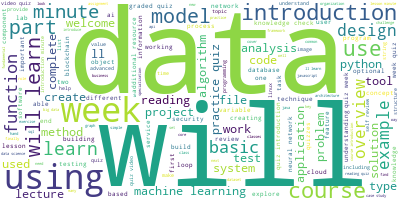

In [251]:
# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = ','.join(list(tmdf['syllabus'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

## Syllabus

In [289]:
import gensim
from gensim.utils import simple_preprocess
import nltk

nltk.download('stopwords')

from nltk.corpus import stopwords

stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use', "welcome", "minute", "course", "quiz", "lesson", "video", 
"project", "overview", "using", "week", "knowledge", "review", "understanding", "test", "data", "introduction", "learn", "learning", "part", "reading", "quizzes",
"testing", "practice"])

def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\neilp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Syllabus

In [290]:
data = tmdf.syllabus.values.tolist()
data_words = list(sent_to_words(data))
# remove stop words
data_words = remove_stopwords(data_words)
print(data_words[:1][0][:30])

import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(data_words)
# Create Corpus
texts = data_words
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1][0][:30])

from pprint import pprint
# number of topics
num_topics = 10
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

import pyLDAvis.gensim
import pickle 
import pyLDAvis
import os
# Visualize the topics
pyLDAvis.enable_notebook()
if not os.path.exists('./results/'):
    os.makedirs('./results/')
LDAvis_data_filepath = os.path.join('./results/ldavis_prepared_'+str(num_topics))
# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)
# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)
pyLDAvis.save_html(LDAvis_prepared, './results/ldavis_prepared_'+ str(num_topics) +'.html')
LDAvis_prepared

['development', 'environment', 'topic', 'three', 'key', 'concepts', 'toolkit', 'develop', 'programs', 'drawing', 'simple', 'shapes', 'coordinates', 'process', 'experience', 'writing', 'code', 'us', 'growth', 'mindset', 'programming', 'js', 'running', 'first', 'program', 'brackets', 'hacking', 'coordinate', 'systems', 'code']
[(0, 1), (1, 1), (2, 1), (3, 2), (4, 1), (5, 2), (6, 3), (7, 2), (8, 1), (9, 2), (10, 8), (11, 1), (12, 1), (13, 1), (14, 2), (15, 3), (16, 5), (17, 2), (18, 1), (19, 2), (20, 1), (21, 2), (22, 3), (23, 1), (24, 1), (25, 1), (26, 2), (27, 4), (28, 1), (29, 2)]
[(0,
  '0.009*"lecture" + 0.005*"programming" + 0.004*"also" + 0.004*"linux" + '
  '0.004*"analysis" + 0.004*"lab" + 0.004*"functions" + 0.003*"assignment" + '
  '0.003*"tools" + 0.003*"python"'),
 (1,
  '0.010*"python" + 0.005*"security" + 0.005*"lecture" + 0.004*"lab" + '
  '0.004*"design" + 0.004*"analysis" + 0.003*"programming" + 0.003*"code" + '
  '0.003*"types" + 0.003*"web"'),
 (2,
  '0.006*"blockchain

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
7     -0.014522  0.022832       1        1  23.669701
3     -0.039685  0.007161       2        1  14.404298
5      0.001582 -0.007725       3        1  13.182025
0      0.013080  0.007186       4        1   9.481550
4     -0.012748 -0.027176       5        1   7.647797
2      0.006003 -0.022781       6        1   7.563943
6      0.004843  0.008183       7        1   7.478423
1      0.017281  0.012034       8        1   6.835237
8      0.005270 -0.005230       9        1   5.277365
9      0.018897  0.005517      10        1   4.459661, topic_info=            Term        Freq       Total Category  logprob  loglift
1684     lecture  810.000000  810.000000  Default  30.0000  30.0000
363       python  605.000000  605.000000  Default  29.0000  29.0000
1966          ai  317.000000  317.000000  Default  28.0000  28.0000
1750  blockchain  302.000000  302.000000  Default  27.0000  27.0000
412        cloud  509.000000  509.000000  Default  26.0000  26.0000
...          ...         ...         ...      ...      ...      ...
483        tools   19.417579  434.469353  Topic10  -6.0389   0.0022
383        types   20.078055  557.465499  Topic10  -6.0055  -0.2137
414     complete   18.211281  435.868552  Topic10  -6.1031  -0.0652
969         used   17.492680  400.824589  Topic10  -6.1433  -0.0216
395     analysis   17.975419  853.944377  Topic10  -6.1161  -0.7508

[853 rows x 6 columns], token_table=       Topic      Freq    Term
term                          
304        1  0.292579    able
304        2  0.161423    able
304        3  0.107615    able
304        4  0.124430    able
304        5  0.057171    able
...      ...       ...     ...
10848      9  0.592403  yogesh
4053       4  0.450430  zenhub
4053      10  0.225215  zenhub
11470      7  0.404326    zuul
11470      8  0.404326    zuul

[3200 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[8, 4, 6, 1, 5, 3, 7, 2, 9, 10])

## About This Course

In [274]:
data = tmdf.aboutThisCourse.values.tolist()
data_words = list(sent_to_words(data))
# remove stop words
data_words = remove_stopwords(data_words)
print(data_words[:1][0][:30])

['mooc', 'provides', 'foundational', 'skill', 'set', 'required', 'write', 'computer', 'programs', 'interested', 'learning', 'write', 'interactive', 'graphical', 'programs', 'introductory', 'level', 'real', 'programming', 'language', 'course', 'begin', 'learning', 'basics', 'editing', 'running', 'programs', 'learn', 'create', 'graphics']


In [275]:
import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(data_words)
# Create Corpus
texts = data_words
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1][0][:30])

from pprint import pprint
# number of topics
num_topics = 10
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

import pyLDAvis.gensim
import pickle 
import pyLDAvis
import os
# Visualize the topics
pyLDAvis.enable_notebook()
if not os.path.exists('./results/'):
    os.makedirs('./results/')
LDAvis_data_filepath = os.path.join('./results/ldavis_prepared_'+str(num_topics))
# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)
# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)
pyLDAvis.save_html(LDAvis_prepared, './results/ldavis_prepared_'+ str(num_topics) +'.html')
LDAvis_prepared

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 3), (7, 2), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 2), (17, 3), (18, 1), (19, 1), (20, 1), (21, 1), (22, 2), (23, 2), (24, 2), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1)]
[(0,
  '0.023*"course" + 0.015*"data" + 0.008*"learn" + 0.007*"using" + '
  '0.007*"science" + 0.007*"design" + 0.006*"concepts" + 0.005*"also" + '
  '0.005*"used" + 0.004*"skills"'),
 (1,
  '0.025*"course" + 0.012*"data" + 0.009*"learn" + 0.007*"systems" + '
  '0.005*"cloud" + 0.005*"also" + 0.005*"system" + 0.005*"using" + '
  '0.004*"computer" + 0.004*"programming"'),
 (2,
  '0.033*"course" + 0.027*"data" + 0.011*"learning" + 0.009*"learn" + '
  '0.007*"machine" + 0.006*"science" + 0.006*"also" + 0.005*"using" + '
  '0.005*"ai" + 0.005*"methods"'),
 (3,
  '0.029*"course" + 0.014*"data" + 0.011*"learning" + 0.010*"programming" + '
  '0.009*"design" + 0.008*"learn" + 0.008*"using" + 0.006*"software" + '
  '0.006*"machine" + 0.00

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.036066  0.010073       1        1  16.952597
9     -0.024109  0.028343       2        1  15.748433
7     -0.024427  0.011541       3        1  15.438582
6     -0.008927 -0.048643       4        1  12.816150
3      0.007132 -0.015367       5        1   9.658710
5     -0.002564 -0.015786       6        1   7.395148
8     -0.001710 -0.011356       7        1   7.261421
0      0.019084  0.015006       8        1   7.181147
1      0.016680  0.020415       9        1   4.841199
4      0.054907  0.005775      10        1   2.706612, topic_info=            Term         Freq        Total Category  logprob  loglift
6         course  1830.000000  1830.000000  Default  30.0000  30.0000
213       python   320.000000   320.000000  Default  29.0000  29.0000
29   programming   366.000000   366.000000  Default  28.0000  28.0000
176         data  1572.000000  1572.000000  Default  27.0000  27.0000
23         learn   669.000000   669.000000  Default  26.0000  26.0000
..           ...          ...          ...      ...      ...      ...
227        world     4.558727   188.239109  Topic10  -5.9721  -0.1112
285         used     4.513579   183.838479  Topic10  -5.9821  -0.0975
229         able     4.498569   208.592573  Topic10  -5.9854  -0.2272
92      software     4.506043   275.154004  Topic10  -5.9837  -0.5024
181          end     4.412365   246.527482  Topic10  -6.0048  -0.4136

[836 rows x 6 columns], token_table=      Topic      Freq          Term
term                               
229       1  0.167791          able
229       2  0.191761          able
229       3  0.162997          able
229       4  0.124645          able
229       5  0.105469          able
...     ...       ...           ...
5416      5  0.128138  wwwamazoncom
5416      6  0.128138  wwwamazoncom
5416      7  0.128138  wwwamazoncom
5416      8  0.384415  wwwamazoncom
5240      3  0.550060           zsh

[2458 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 10, 8, 7, 4, 6, 9, 1, 2, 5])

## Title

In [277]:
data = tmdf.title.values.tolist()
data_words = list(sent_to_words(data))
# remove stop words
data_words = remove_stopwords(data_words)
print(data_words[:1][0][:30])

import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(data_words)
# Create Corpus
texts = data_words
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1][0][:30])

from pprint import pprint
# number of topics
num_topics = 10
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

import pyLDAvis.gensim
import pickle 
import pyLDAvis
import os
# Visualize the topics
pyLDAvis.enable_notebook()
if not os.path.exists('./results/'):
    os.makedirs('./results/')
LDAvis_data_filepath = os.path.join('./results/ldavis_prepared_'+str(num_topics))
# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)
# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)
pyLDAvis.save_html(LDAvis_prepared, './results/ldavis_prepared_'+ str(num_topics) +'.html')
LDAvis_prepared

['introduction', 'computer', 'programming']
[(0, 1), (1, 1), (2, 1)]
[(0,
  '0.090*"data" + 0.030*"introduction" + 0.024*"capstone" + '
  '0.023*"programming" + 0.021*"big" + 0.021*"software" + 0.019*"science" + '
  '0.016*"python" + 0.016*"analysis" + 0.013*"analytics"'),
 (1,
  '0.050*"introduction" + 0.041*"programming" + 0.019*"python" + '
  '0.019*"databases" + 0.016*"ai" + 0.013*"enterprise" + 0.013*"java" + '
  '0.013*"systems" + 0.010*"data" + 0.010*"database"'),
 (2,
  '0.024*"introduction" + 0.024*"linux" + 0.018*"design" + 0.016*"development" '
  '+ 0.012*"programming" + 0.012*"digital" + 0.012*"processing" + '
  '0.012*"raspberry" + 0.012*"pi" + 0.012*"systems"'),
 (3,
  '0.028*"data" + 0.021*"cloud" + 0.016*"introduction" + 0.014*"tools" + '
  '0.014*"applications" + 0.014*"development" + 0.014*"project" + '
  '0.011*"power" + 0.011*"azure" + 0.011*"science"'),
 (4,
  '0.041*"programming" + 0.024*"software" + 0.021*"design" + 0.017*"java" + '
  '0.014*"learning" + 0.014*"w

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.081329 -0.053478       1        1  15.192469
5      0.125118  0.025216       2        1  11.833352
9      0.103011  0.004302       3        1  11.748647
7     -0.003299  0.022869       4        1  10.029572
6     -0.086263  0.028802       5        1   9.466547
8     -0.026027  0.163482       6        1   9.364612
1     -0.067697 -0.081606       7        1   8.646280
4     -0.031056 -0.119763       8        1   8.540901
3      0.022470 -0.003435       9        1   8.085260
2     -0.117586  0.013611      10        1   7.092361, topic_info=            Term        Freq       Total Category  logprob  loglift
8           data  117.000000  117.000000  Default  30.0000  30.0000
2    programming   42.000000   42.000000  Default  29.0000  29.0000
1   introduction   63.000000   63.000000  Default  28.0000  28.0000
18      learning   49.000000   49.000000  Default  27.0000  27.0000
19       machine   39.000000   39.000000  Default  26.0000  26.0000
..           ...         ...         ...      ...      ...      ...
15           sql    1.234748    8.445798  Topic10  -5.0779   0.7233
47         cloud    1.602985   28.749386  Topic10  -4.8169  -0.2406
19       machine    1.602969   39.085722  Topic10  -4.8169  -0.5477
18      learning    1.602867   49.364868  Topic10  -4.8169  -0.7813
10        python    0.839805   33.889598  Topic10  -5.4633  -1.0515

[639 rows x 6 columns], token_table=      Topic      Freq         Term
term                              
789       8  0.628114  abstraction
145       1  0.660097       access
591       2  0.211134   accounting
591       3  0.422268   accounting
591       4  0.211134   accounting
...     ...       ...          ...
717       6  0.184294     workflow
717       7  0.368589     workflow
717       9  0.184294     workflow
198       7  0.654480        world
603       4  0.650562        yocto

[976 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 6, 10, 8, 7, 9, 2, 5, 4, 3])